I want to output words frequency.I already pro-processed texts and use directly the lemmad text

! /usr/local/anaconda3/envs/numpy_env/bin/pip install adjustText


In [12]:
from pathlib import Path
from collections import Counter
import pandas as pd

# === 1. Folder path with all cleaned text files ===
folder_path = Path("../Corpus_deepseek_cleaned")

# === 2. Read and combine all files into one big string ===
all_text = ""
for file in folder_path.glob("*.txt"):  # read only .txt files
    with open(file, "r", encoding="utf-8") as f:
        all_text += f.read() + " "  # add space to separate files

# === 3. Split into words ===
words = all_text.split()  # basic split by whitespace

# === 4. Count word frequencies ===
word_freq = Counter(words)

# === 5. Convert to DataFrame for analysis ===
df = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"])
df = df.sort_values(by="Frequency", ascending=False)

# === 6. Show top 50 words ===
print(df.head(50))

# Save to CSV
df.to_csv("../word_frequency_all_texts.csv", index=False, encoding="utf-8")
print("Word frequency table saved as word_frequency_all_texts.csv")



              Word  Frequency
5               ai       1134
12        deepseek       1028
49             say        638
6            model        629
58               u        496
4          chinese        439
48         company        434
70           china        381
27            tech        306
376            use        294
40          openai        251
69            chip        236
8       technology        208
178           data        204
290           also        202
301         market        197
150            app        197
17             new        183
204           make        182
279         nvidia        171
155        chatgpt        166
89             one        164
126     government        162
47            cost        158
232          could        157
21            year        152
109           like        150
251       question        144
11            call        140
256            may        138
9         industry        137
217           firm        134
361   inte

What can we do with word frequency?

In my practical work, I analyze word frequency using tools like Voyant and AntConc. When I examined word frequency in Voyant, I noticed some words highlighted in green and others in red. Later, I discovered that these colors indicate sentiment—green represents positive words, while red indicates negative words.

This observation inspired me to explore further: What positive and negative words does the media use to describe “DeepSeek”?

Additionally, the paper “History Text” also inspired me in this research direction.

pip install openpyxl


We obtain a sentiment score for each word so that we can analyze both sentiment and frequency simultaneously. By applying sentiment analysis to individual words, each word receives a polarity score ranging from -1 to 1, where negative values indicate negative sentiment, positive values indicate positive sentiment, and zero means neutral. We then remove all neutral words (score = 0) to focus only on words with clear sentiment.

In [14]:
import os
import pandas as pd
from textblob import TextBlob

# Load word frequency table from CSV 
df = pd.read_csv("../word_frequency_all_texts.csv")

# Ensure all values in the 'Word' column are strings
df["Word"] = df["Word"].astype(str)

# Define a function to get sentiment scores using TextBlob
def get_sentiment(word):
    score = TextBlob(word).sentiment.polarity  # Polarity score ranges from -1 to 1
    return score

# Apply sentiment analysis to each word
df["Sentiment Score"] = df["Word"].apply(get_sentiment)

# Remove neutral words (score = 0)
df = df[df["Sentiment Score"] != 0]

# Sort by sentiment score
df = df.sort_values(by="Sentiment Score", ascending=False)

# Export the filtered table to a new CSV file
file_path = os.path.join('sentiment_word_frequencies_textblob_update.csv')
df.to_csv(file_path, index=False)

print("Filtered sentiment table saved as 'sentiment_word_frequencies_textblob_update.csv'!")

Filtered sentiment table saved as 'sentiment_word_frequencies_textblob_update.csv'!


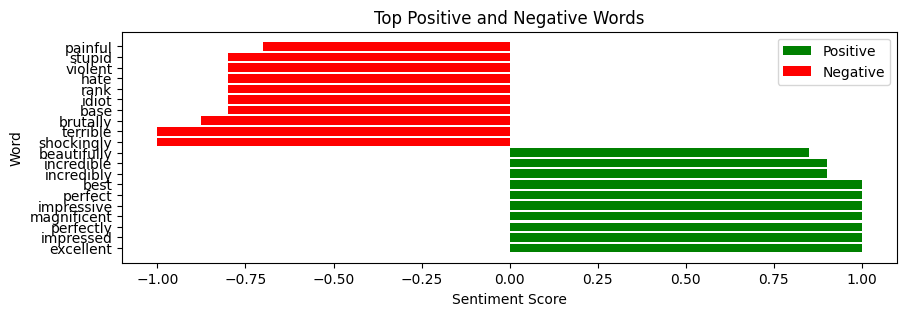

In [16]:
#let's visualize the result
import matplotlib.pyplot as plt

# Select top 10 positive and negative words
top_pos = df.nlargest(10, "Sentiment Score")
top_neg = df.nsmallest(10, "Sentiment Score")

# Plot
plt.figure(figsize=(10, 3))
plt.barh(top_pos["Word"], top_pos["Sentiment Score"], color="green", label="Positive")
plt.barh(top_neg["Word"], top_neg["Sentiment Score"], color="red", label="Negative")
plt.xlabel("Sentiment Score")
plt.ylabel("Word")
plt.title("Top Positive and Negative Words")
plt.legend()
plt.show()


In [141]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("sentiment_word_frequencies_textblob_update.csv")

# Ensure numeric values for filtering
df["Frequency"] = pd.to_numeric(df["Frequency"], errors="coerce")
df["Sentiment Score"] = pd.to_numeric(df["Sentiment Score"], errors="coerce")

# Remove words with frequency < 20 or sentiment score < 0.5
# keep rows where frequency is greater than 20 and positive OR words with low frequency but sentiment score is at least 0.5.
# If a word has frequency = 1 but sentiment score ≥ 0.5, it still passes the filter 
# because of the OR (|).

df_filtered = df[((df["Frequency"] > 20) & (df["Sentiment Score"] > 0)) | (df["Sentiment Score"] >= 0.5)]

# Save the cleaned data to a new file
df_filtered.to_csv("positive_sentiment_words_update.csv", index=False)

print("✅ Done! The filtered words are saved in 'positive_sentiment_words_update.csv'.")

✅ Done! The filtered words are saved in 'positive_sentiment_words_update.csv'.


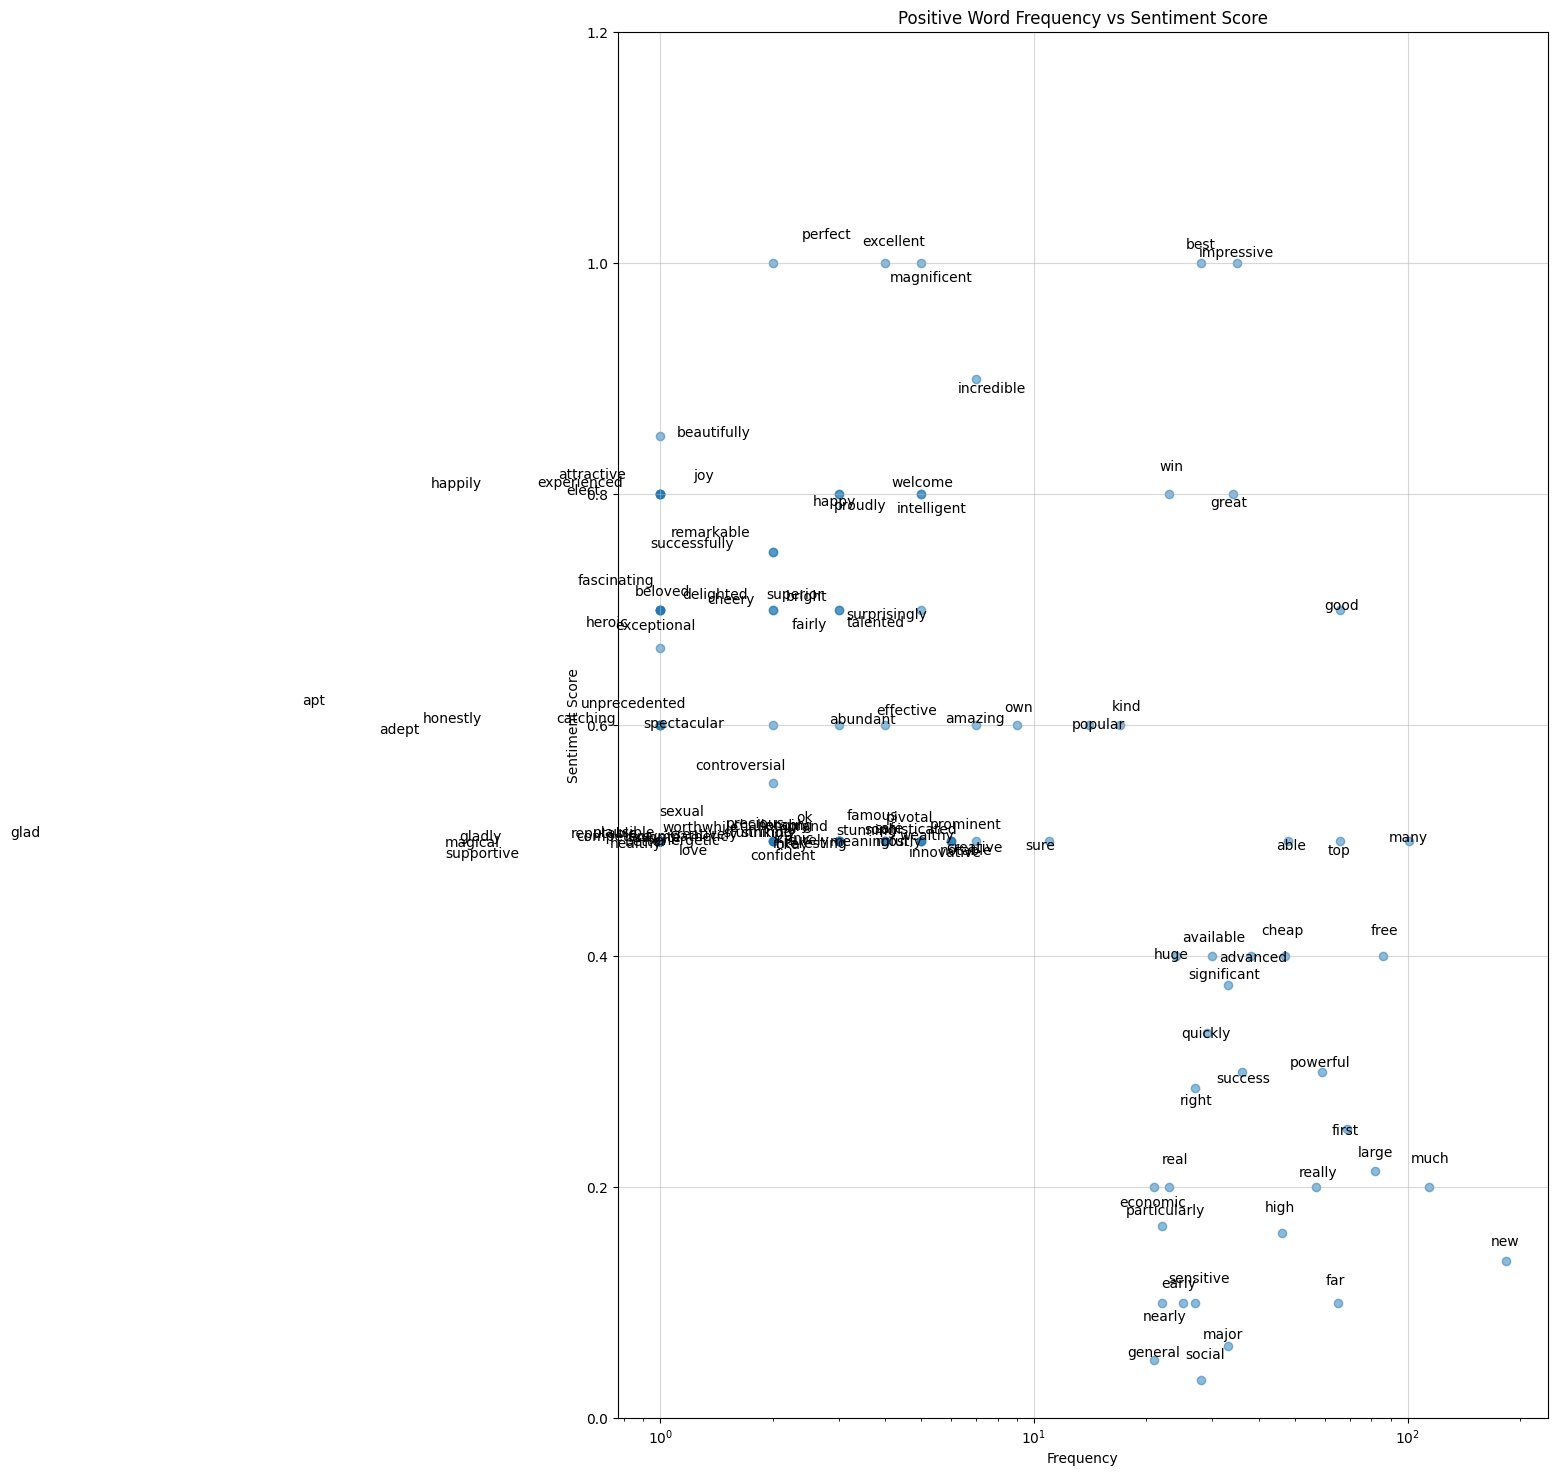

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data from csv file
file_path = 'positive_sentiment_words_update_merge.csv'  
df = pd.read_csv(file_path)

# Create a scatter plot
plt.figure(figsize=(12, 18))
plt.scatter(df['Frequency'], df['Sentiment Score'], alpha=0.5)
plt.xscale('log')
for i, row in df.iterrows():
    plt.ylim(0, 1.2)


# Add grid for better readability
plt.grid(True, alpha=0.5)


# Add labels to each point with offset
for i, row in df.iterrows():
    offset_x = np.random.uniform(-1, 1)
    offset_y = np.random.uniform(-0.02, 0.02)
    plt.text(row['Frequency'] + offset_x, row['Sentiment Score'] + offset_y, row['Word'], fontsize=10, ha='center', va='bottom')

# Set plot title and axis labels
plt.title('Positive Word Frequency vs Sentiment Score')
plt.xlabel('Frequency')
plt.ylabel('Sentiment Score')

# Save as PNG
#plt.savefig("positive_word_frequency_vs_sentiment.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


45 [ 0.00608158 -0.60272479]
46 [ 0.09879572 -0.33428372]
49 [-0.79135966 -0.67423675]
54 [0.99372738 0.97713578]
55 [-0.57199617  0.49046032]
56 [-0.50372794 -0.94235036]
58 [-0.41484635  0.53462336]
63 [-0.13076654 -0.50282225]
64 [0.21621558 0.3937556 ]
67 [-0.90950917 -0.56227281]
69 [-0.63150575  0.35342268]
71 [0.98117935 0.66213295]
75 [-0.26292984  0.41989468]
80 [0.26550496 0.76718427]
83 [ 0.42193711 -0.57017575]
84 [0.32273424 0.80333829]
85 [-0.46752979  0.95455572]
32 [ 0.08113138 -0.28299634]
33 [ 0.97683424 -0.71568914]
34 [-0.26417753  0.96233529]
41 [0.40251143 0.97582531]
20 [-0.64626422  0.89120335]
21 [0.82302262 0.07908669]
22 [0.95870543 0.5071502 ]
28 [-0.08393083 -0.28695805]
29 [-0.7928987   0.65520118]
8 [ 0.42209421 -0.34315563]
12 [-0.91962138  0.03609768]
16 [ 0.24360623 -0.07559831]
62 [-0.55584427 -0.34912372]
68 [0.0495466  0.55173428]
73 [-0.0005898  -0.11749915]
82 [ 0.84526388 -0.85800985]
23 [-0.86756195 -0.7596911 ]
27 [0.4697374  0.85784567]
17 [0.

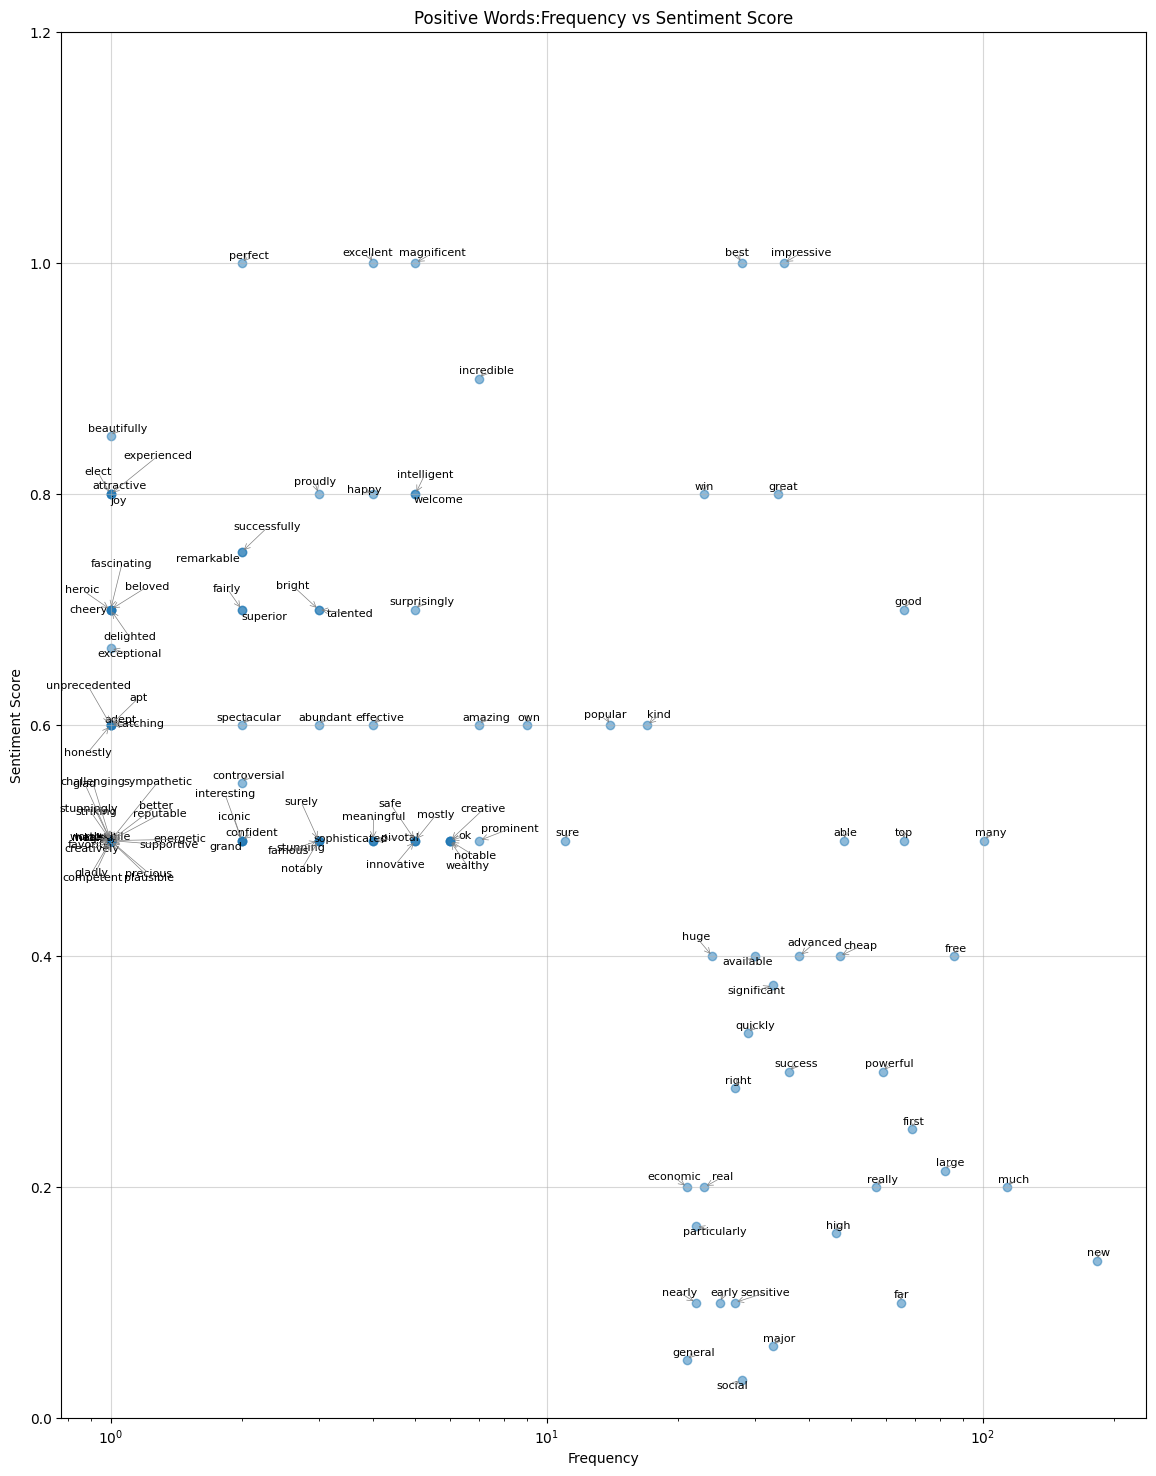

In [197]:
from adjustText import adjust_text
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data from csv file
file_path = 'positive_sentiment_words_update_merge.csv'  
df = pd.read_csv(file_path)

# Create a scatter plot
plt.figure(figsize=(14, 18))
plt.scatter(df['Frequency'], df['Sentiment Score'], alpha=0.5)
plt.xscale('log')
plt.ylim(0, 1.2)

# Add grid for better readability
plt.grid(True, alpha=0.5)

# add lables
texts = []
for i, row in df.iterrows():
    # Position texts at exact points first
    texts.append(plt.text(row['Frequency'], row['Sentiment Score'], row['Word'], fontsize=8, ha='center', va='bottom'))

# Adjust text to reduce overlap
adjust_text(texts, 
            expand_points=(3.0, 4.0),   # controls how much labels move away from points
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),  # optional arrows
            force_text=3.0,             # force to move text labels
            force_points=2.0)

plt.title('Positive Words:Frequency vs Sentiment Score')
plt.xlabel('Frequency')
plt.ylabel('Sentiment Score')

plt.savefig("positive_word_frequency_vs_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()


Now let's do the negative words part.

In [215]:
import pandas as pd

# Load the csv file
df = pd.read_csv("sentiment_word_frequencies_textblob_update.csv")

# Ensure numeric values for filtering
df["Frequency"] = pd.to_numeric(df["Frequency"], errors="coerce")
df["Sentiment Score"] = pd.to_numeric(df["Sentiment Score"], errors="coerce")

# Filter the data
df_filtered = df[
    (df["Sentiment Score"] < 0) & 
    ((df["Frequency"] >= 20) | (df["Sentiment Score"] < -0.5))
]

# Save the cleaned data to a new file
df_filtered.to_csv("negative_sentiment_words_update.csv", index=False)

print("✅ Done! The filtered words are saved in 'negative_sentiment_words_update.csv'.")
print(df_filtered.columns)

✅ Done! The filtered words are saved in 'negative_sentiment_words_update.csv'.
Index(['Word', 'Frequency', 'Sentiment Score'], dtype='object')


the result has 35 words, so it's available for virualization.

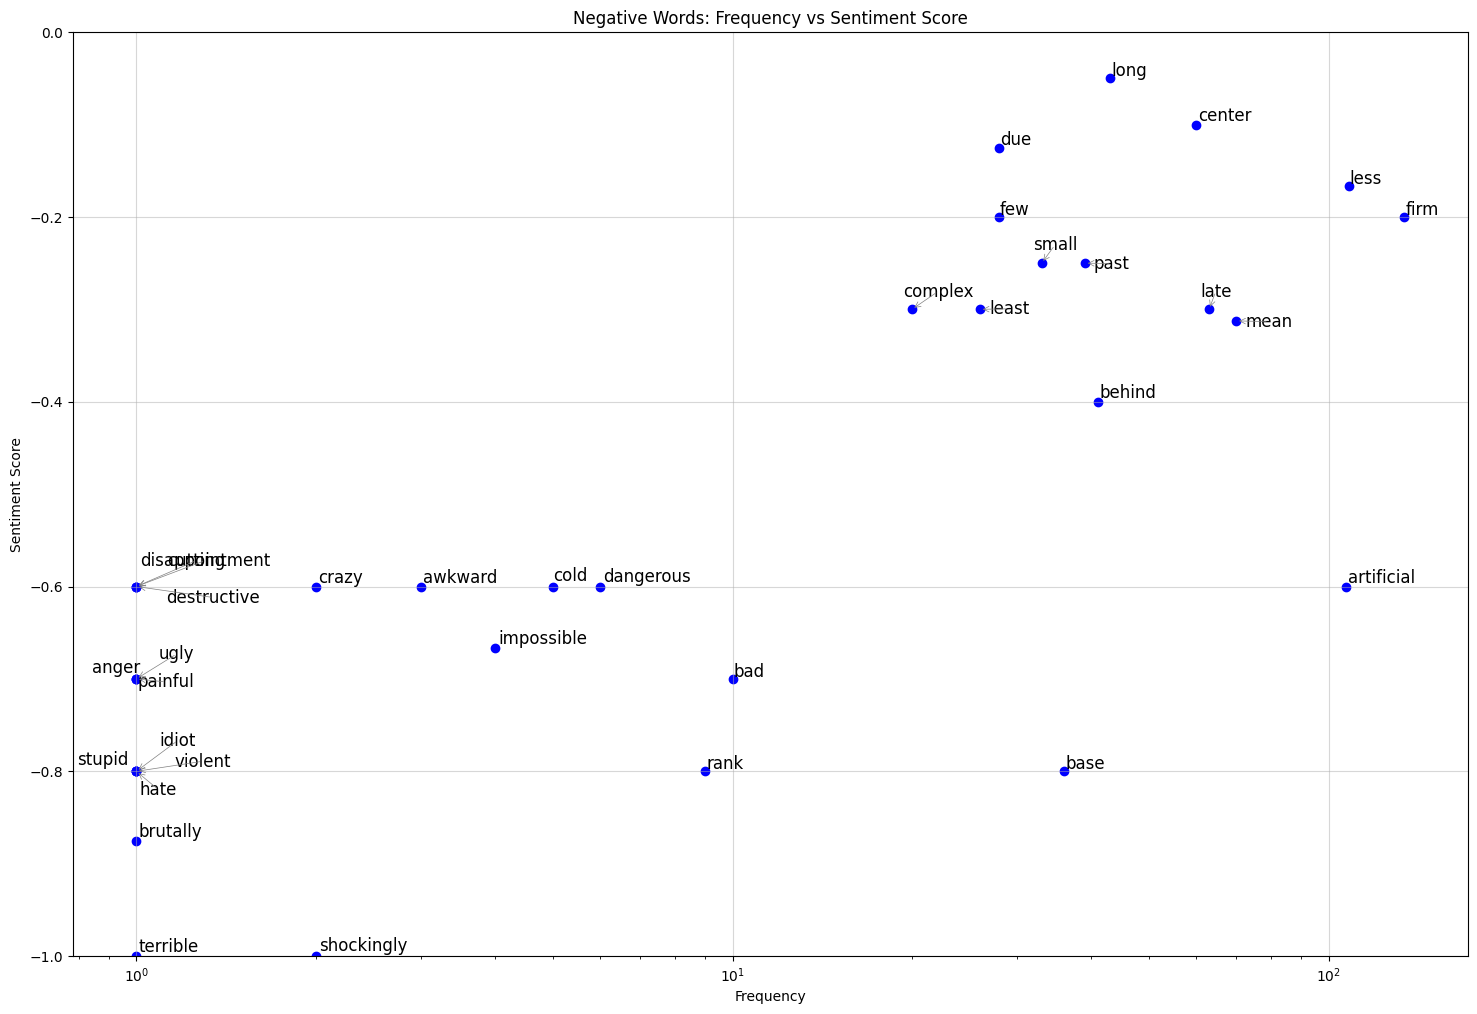

In [227]:
# Plot only the filtered data
from adjustText import adjust_text

plt.figure(figsize=(18, 12))
plt.scatter(df_filtered['Frequency'], df_filtered['Sentiment Score'], color='blue')

texts = []
for i, row in df_filtered.iterrows():
    texts.append(plt.text(row['Frequency'], row['Sentiment Score'], row['Word'], fontsize=12))

plt.ylim(-1, 0)
plt.grid(True, alpha=0.5)
plt.title('Negative Words: Frequency vs Sentiment Score')
plt.xlabel('Frequency')
plt.ylabel('Sentiment Score')

plt.xscale('log')

# Adjust text to reduce overlap
adjust_text(texts, 
            expand_points=(3.0, 4.0),   # controls how much labels move away from points
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),  # optional arrows
            force_text=3.0,             # force to move text labels
            force_points=2.0)

plt.savefig("negative_word_frequency_vs_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()

5 [-0.74242935  0.18152061]
11 [-0.20582021 -0.10642022]
1 [ 0.43750968 -0.23166965]
7 [-0.77397523 -0.01627531]
0 [0.33404139 0.20678408]
5 [0.67939483 0.45912676]


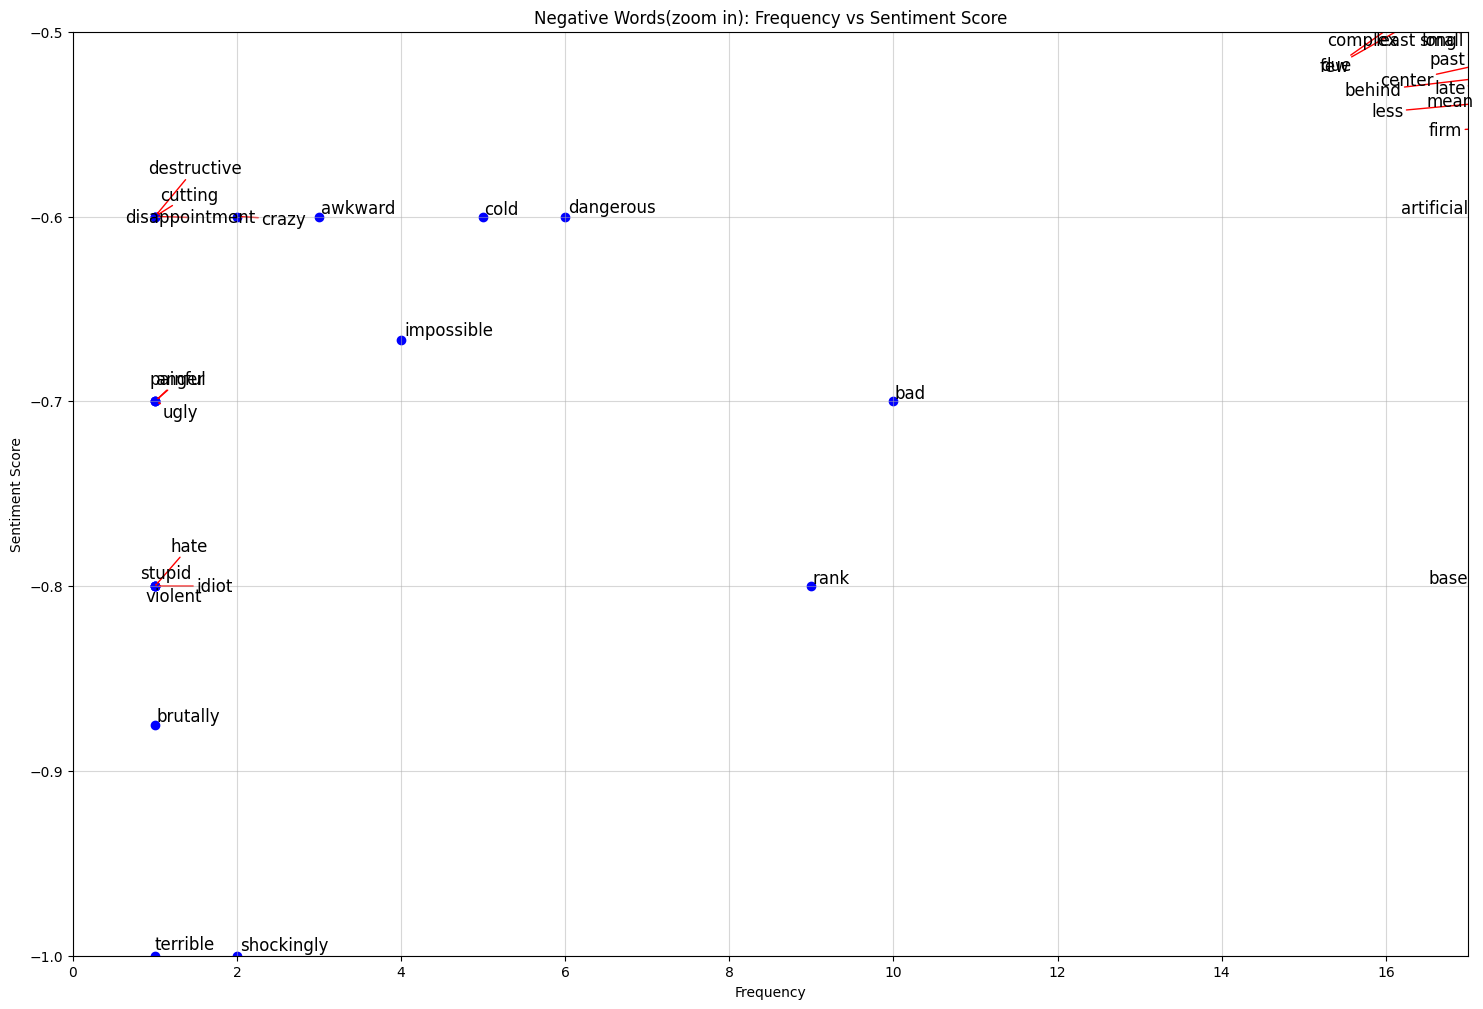

In [231]:
#zoom intoa Sub-Region (Set axis limits)
#Use plt.xlim() and plt.ylim() to focus on a smaller range of data.

from adjustText import adjust_text

plt.figure(figsize=(18, 12))
plt.scatter(df_filtered['Frequency'], df_filtered['Sentiment Score'], color='blue')

texts = []
for i, row in df_filtered.iterrows():
    texts.append(plt.text(row['Frequency'], row['Sentiment Score'], row['Word'], fontsize=12))

plt.xlim(0, 17)   # show only frequencies between 0 and 17
plt.ylim(-1.00, -0.50) # restrict sentiment score between -0.5 and 1.0
plt.grid(True, alpha=0.5)
plt.title('Negative Words(zoom in): Frequency vs Sentiment Score')
plt.xlabel('Frequency')
plt.ylabel('Sentiment Score')

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.savefig("negative_word_frequency_vs_sentiment_zoom_in.png", dpi=300, bbox_inches='tight')
plt.show()
